El dataset utilizado en este proyecto contiene reseñas de usuarios sobre videojuegos disponibles en la plataforma **Steam**, el mismo fue extraido de Kaggle(https://www.kaggle.com/datasets/andrewmvd/steam-reviews). Cada registro representa una opinión escrita por un usuario, junto con el nombre del juego al que hace referencia.

El objetivo principal de este análisis es trabajar con técnicas de procesamiento de lenguaje natural y Deep Learning para entender el contenido de las reseñas, clasificarlas por sentimiento (positivo, negativo o neutro), y visualizar las palabras más representativas mediante nubes de palabras.

Con el fin de reducir el tamaño del dataset (que en su comienzo tenia aproximadamente 6 mllones de filas) se trabajo especialmente con las reseñas del juego Counter Strike, permitiendo asi un tratamiento mas eficiente y especxificvo
Dentro del conjunto de datos, se trabajó especialmente con las reseñas relacionadas al juego Counter-Strike, con el fin de reducir el tamaño del dataset y enfocar el análisis en un solo título, permitiendo así un tratamiento más eficiente y específico del lenguaje utilizado por los usuarios.

# Librerias

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

# Proyecto Counter Strike

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/data science/data3/dataset.csv')

In [5]:
df

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [6]:
df.drop(['review_score', 'review_votes', 'app_id'], axis=1, inplace=True)

In [ ]:
df

,app_name,review_text
0,Counter-Strike,Ruined my life.
1,Counter-Strike,This will be more of a ''my experience with th...
2,Counter-Strike,This game saved my virginity.
3,Counter-Strike,• Do you like original games? • Do you like ga...
4,Counter-Strike,"Easy to learn, hard to master."
...,...,...
6417101,Puzzle Pirates,I really ove this game but it needs somethings...
6417102,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b..."
6417103,Puzzle Pirates,"This game was aright, though a bit annoying. W..."
6417104,Puzzle Pirates,"I had a nice review to recommend this game, bu..."


In [7]:
reviews_cs = df[df["app_name"].str.lower() == "counter-strike"]
reviews_cs

,app_name,review_text
0,Counter-Strike,Ruined my life.
1,Counter-Strike,This will be more of a ''my experience with th...
2,Counter-Strike,This game saved my virginity.
3,Counter-Strike,• Do you like original games? • Do you like ga...
4,Counter-Strike,"Easy to learn, hard to master."
...,...,...
12348,Counter-Strike,&gt;never played any counter-strike &gt;Buys g...
12349,Counter-Strike,"This is where a new era began: LAN parties, st..."
12350,Counter-Strike,10/10 would shoot a bullet from a silenced rif...
12351,Counter-Strike,Good old school game. Some cheaters though whi...


In [8]:
reviews = reviews_cs[['review_text']].copy()
reviews

,review_text
0,Ruined my life.
1,This will be more of a ''my experience with th...
2,This game saved my virginity.
3,• Do you like original games? • Do you like ga...
4,"Easy to learn, hard to master."
...,...
12348,&gt;never played any counter-strike &gt;Buys g...
12349,"This is where a new era began: LAN parties, st..."
12350,10/10 would shoot a bullet from a silenced rif...
12351,Good old school game. Some cheaters though whi...


In [9]:
def limpieza (texto):
    texto = str(texto).lower()

    texto = re.sub(r'\[.*?\]', '', texto)

    texto = re.sub(r'https?://\S+\www\.\S+', '', texto)

    texto = re.sub(r'<.*?>+', '', texto)

    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto)

    texto = re.sub(r'\n', '', texto)

    texto = re.sub(r'\w*\d\w*', '', texto)

    texto = re.sub(r'[^\x00-\x7F]+', '', texto)

    texto = texto.strip()

    return texto

In [10]:
reviews['reviews_limpios'] = reviews['review_text'].apply(limpieza)

In [ ]:
reviews

,review_text,reviews_limpios
0,Ruined my life.,ruined my life
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...
2,This game saved my virginity.,this game saved my virginity
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...
4,"Easy to learn, hard to master.",easy to learn hard to master
...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...


In [ ]:
!python -m spacy download en_core_web_sm

In [11]:
import spacy

In [12]:
nlp = spacy.load("en_core_web_sm")

In [13]:
def tokenizar(texto):
    doc = nlp(texto)
    return [token.text for token in doc]

In [14]:
reviews["tokens"] = reviews["reviews_limpios"].apply(tokenizar)

In [ ]:
reviews

,review_text,reviews_limpios,tokens
0,Ruined my life.,ruined my life,"[ruined, my, life]"
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...,"[this, will, be, more, of, a, my, experience, ..."
2,This game saved my virginity.,this game saved my virginity,"[this, game, saved, my, virginity]"
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...,"[do, you, like, original, games, , do, you, l..."
4,"Easy to learn, hard to master.",easy to learn hard to master,"[easy, to, learn, hard, to, master]"
...,...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...,"[gtnever, played, any, counterstrike, gtbuys, ..."
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...,"[this, is, where, a, new, era, began, lan, par..."
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...,"[would, shoot, a, bullet, from, a, silenced, r..."
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...,"[good, old, school, game, some, cheaters, thou..."


In [15]:
def procesar_texto(texto):
    doc = nlp(texto)
    tokens_limpios = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return tokens_limpios

In [16]:
reviews["token_no_stopwords__token_lematizado"] = reviews["reviews_limpios"].apply(procesar_texto)

In [ ]:
reviews

,review_text,reviews_limpios,tokens,token_no_stopwords__token_lematizado
0,Ruined my life.,ruined my life,"[ruined, my, life]","[ruin, life]"
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...,"[this, will, be, more, of, a, my, experience, ...","[experience, game, type, review, say, thing, l..."
2,This game saved my virginity.,this game saved my virginity,"[this, game, saved, my, virginity]","[game, save, virginity]"
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...,"[do, you, like, original, games, , do, you, l...","[like, original, game, like, game, not, lag, l..."
4,"Easy to learn, hard to master.",easy to learn hard to master,"[easy, to, learn, hard, to, master]","[easy, learn, hard, master]"
...,...,...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...,"[gtnever, played, any, counterstrike, gtbuys, ...","[gtnever, play, counterstrike, gtbuy, game, gt..."
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...,"[this, is, where, a, new, era, began, lan, par...","[new, era, begin, lan, party, steam, computer,..."
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...,"[would, shoot, a, bullet, from, a, silenced, r...","[shoot, bullet, silence, rifle, foot, thick, c..."
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...,"[good, old, school, game, some, cheaters, thou...","[good, old, school, game, cheater, admin, serv..."


In [17]:
todos_los_tokens = reviews["token_no_stopwords__token_lematizado"].explode()
contador = Counter(todos_los_tokens)

print (contador.most_common(10))

[('game', 9632), ('good', 4059), ('play', 3407), ('not', 1436), ('old', 1330), ('cs', 1241), ('time', 1078), ('fps', 1073), ('great', 966), ('like', 958)]


In [ ]:
!pip install TextBlob

In [71]:
from textblob import TextBlob

def sentimiento(txt):
    sentim = TextBlob(txt).sentiment.polarity

    if sentim > 0:
        return "Positiva"
    else:
        return "Negativo"

In [45]:
reviews["sentimiento"] = reviews['reviews_limpios'].apply(lambda x: sentimiento(" ".join(x) if isinstance(x, list) else str(x)))
reviews

,review_text,reviews_limpios,tokens,token_no_stopwords__token_lematizado,sentimiento
0,Ruined my life.,ruined my life,"[ruined, my, life]","[ruin, life]",Negativo
1,This will be more of a ''my experience with th...,this will be more of a my experience with this...,"[this, will, be, more, of, a, my, experience, ...","[experience, game, type, review, say, thing, l...",Positiva
2,This game saved my virginity.,this game saved my virginity,"[this, game, saved, my, virginity]","[game, save, virginity]",Negativo
3,• Do you like original games? • Do you like ga...,do you like original games do you like games ...,"[do, you, like, original, games, , do, you, l...","[like, original, game, like, game, not, lag, l...",Positiva
4,"Easy to learn, hard to master.",easy to learn hard to master,"[easy, to, learn, hard, to, master]","[easy, learn, hard, master]",Negativo
...,...,...,...,...,...
12348,&gt;never played any counter-strike &gt;Buys g...,gtnever played any counterstrike gtbuys game g...,"[gtnever, played, any, counterstrike, gtbuys, ...","[gtnever, play, counterstrike, gtbuy, game, gt...",Negativo
12349,"This is where a new era began: LAN parties, st...",this is where a new era began lan parties stea...,"[this, is, where, a, new, era, began, lan, par...","[new, era, begin, lan, party, steam, computer,...",Negativo
12350,10/10 would shoot a bullet from a silenced rif...,would shoot a bullet from a silenced rifle thr...,"[would, shoot, a, bullet, from, a, silenced, r...","[shoot, bullet, silence, rifle, foot, thick, c...",Negativo
12351,Good old school game. Some cheaters though whi...,good old school game some cheaters though whic...,"[good, old, school, game, some, cheaters, thou...","[good, old, school, game, cheater, admin, serv...",Negativo


In [ ]:
!pip install wordcloud

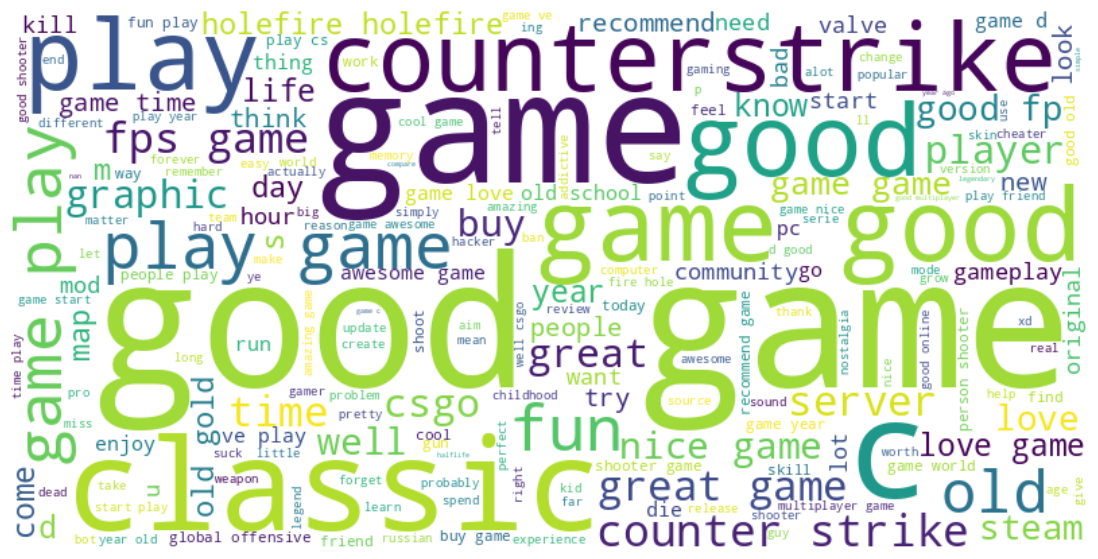

In [46]:
from wordcloud import WordCloud

tokens_limpios = [str(token) for token in sum(reviews["token_no_stopwords__token_lematizado"], []) if pd.notnull(token)]
texto_completo = ' '.join(tokens_limpios)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

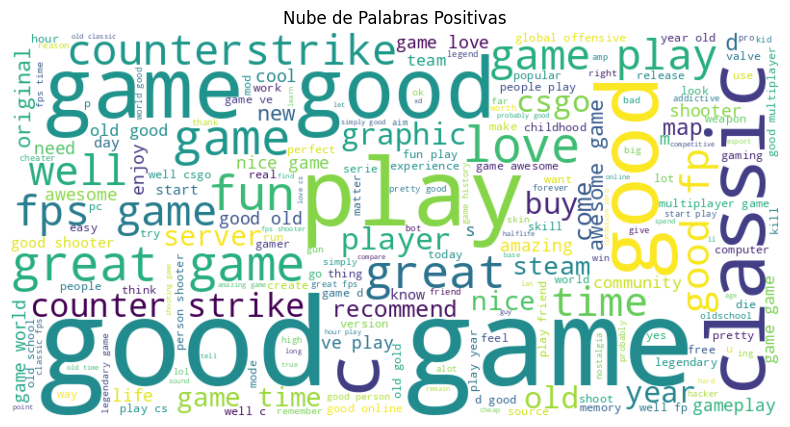

In [47]:
tokens_pos = reviews[reviews['sentimiento'] == 'Positiva']['token_no_stopwords__token_lematizado']

tokens_pos = tokens_pos.explode().dropna().astype(str)
texto_pos = " ".join(tokens_pos)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Positivas")
plt.show()

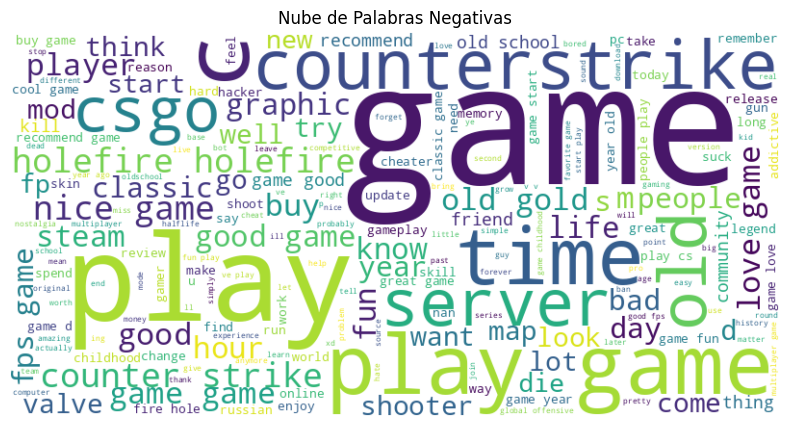

In [48]:
tokens_pos = reviews[reviews['sentimiento'] == 'Negativo']['token_no_stopwords__token_lematizado']

tokens_pos = tokens_pos.explode().dropna().astype(str)
texto_pos = " ".join(tokens_pos)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Negativas")
plt.show()

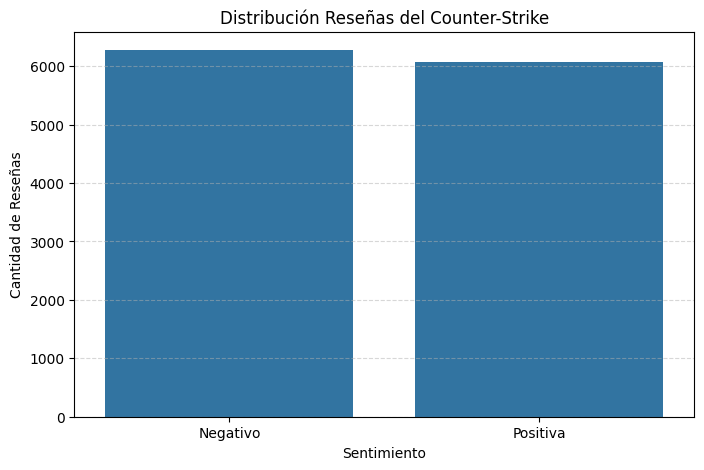

In [72]:
conteo = reviews["sentimiento"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=conteo.index, y=conteo.values)
plt.title("Distribución Reseñas del Counter-Strike")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Reseñas")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Se analizaron alrededor de 12.000 reseñas del juego **Counter-Strike**.
- Se aplicó un análisis de sentimiento utilizando TextBlob, clasificando las reseñas en:
  - Positivas (si polarity era mayor a 0)
  - Negativas (si polarity era menor a 0)

- Las reseñas fueron muy divididas, con una leve inclinacion por las negativas.


- Las nubes de palabras positivas destacan términos como: good, fun, great, free, awesome, entre otras.

- Algunas reseñas no fueron calificadas correctamente debido a que contenian frases ironicas, o emojis, cosa que el modelo no interpreta del todo bien.(ej: THATS MY GAME :), que la clasifico como negativa ).


In [54]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
etiquetas_codificadas = encoder.fit_transform(reviews['sentimiento'])
y = to_categorical(etiquetas_codificadas)


In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews["reviews_limpios"])

secuencias = tokenizer.texts_to_sequences(reviews["reviews_limpios"])
padded = pad_sequences(secuencias, padding='post', maxlen=100)

vocab_size = len(tokenizer.word_index) + 1

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historial = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5078 - loss: 0.6918 - val_accuracy: 0.4998 - val_loss: 0.6770
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6443 - loss: 0.6433 - val_accuracy: 0.7653 - val_loss: 0.5161
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7860 - loss: 0.4806 - val_accuracy: 0.8507 - val_loss: 0.4191
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8614 - loss: 0.3700 - val_accuracy: 0.8725 - val_loss: 0.3807
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8678 - loss: 0.3222 - val_accuracy: 0.8802 - val_loss: 0.3272
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8980 - loss: 0.2680 - val_accuracy: 0.7280 - val_loss: 0.4425
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8606 - loss: 0.3172 - val_accuracy: 0.9004 - val_loss: 0.3088
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9325 - loss: 0.2021 - val_accu

El modelo empezo con un rendimiento bajo en el primer epoch, mostrando una precisión de entrenamiento del 50% y una precisión de validación del 48%. Esto es esperable al inicio del entrenamiento, cuando los pesos están inicializados aleatoriamente.

A medida que avanzaron los epochs, el modelo mostró una mejora progresiva y significativa tanto en la precisión como en la función de pérdida.

En el epoch 5, ya alcanzó un 86% de accuracy en entrenamiento y 88% en validación, lo que nos indica que empezo a aprender patrones significativos del dataset.

En el epoch 9, la precisión en el conjunto de validación saltó al 90%.

En el epoch 10, el modelo cerró con una precisión de entrenamiento del 94% y una precisión de validación del 91%, con un valor de pérdida bajo, lo que indica un muy buen ajuste sin signos fuertes de sobreajuste

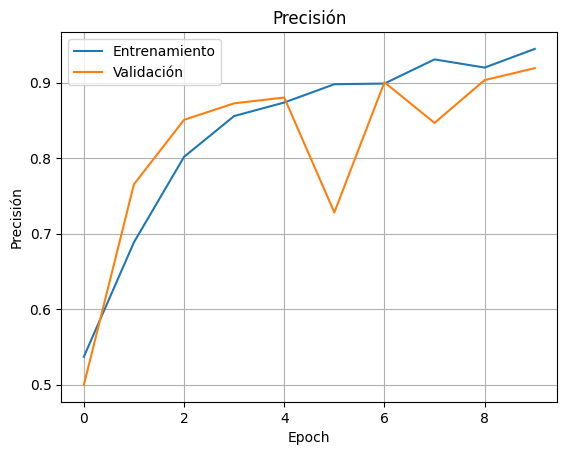

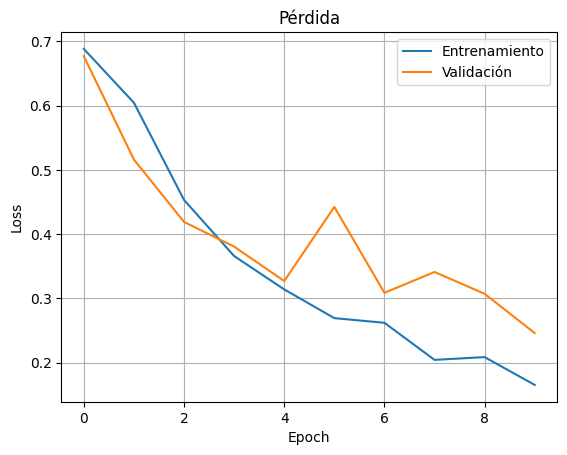

In [66]:
import matplotlib.pyplot as plt

plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

***Precisión***

Se puede ver que las dos curvas aumentan de manera sostenida, lo que muestra un aprendizaje efectivo. Aunque tiene un leve pico en la epoch 5, lo que puede llegar a indicar que ciertos patrones le cuestan mas.

Ya terminando con el entrenamiento se puede apreciar que la presicion en el entrenamiento subio hasta 94% y en validazion hasta 91%.


***Pérdida***

Se puede ver que las dos curvas bajan de manera continua y consistente, lo que muestra que con el paso de las epoch, baja el error, aunque como vimos en el grafico de precision, tambien tuvo un pico en la epoch 5.

Se aprecia que la diferencia entre ambas lineas es estable, esto indica que no hay sobreajuste.

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


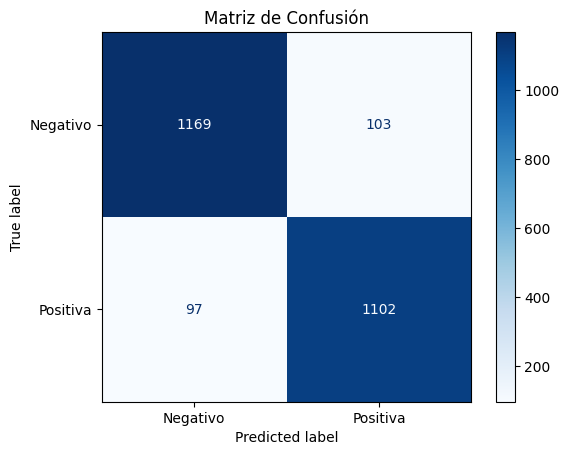

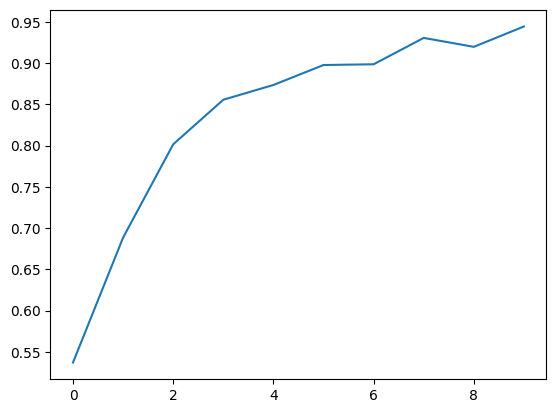

In [68]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.show()


 ***Matriz de Confusion***

Como podemos apreciar, de 1272 casos negativos, logro predecir 1169, con 103 casos de falso positivos. En cuanto a los positivos, de 1199, predijo bien 1102 y tuvo 97 falsos negativos.

 ***Linea de Epochs***

Como se puede ver, la linea asciende constantemente con el correr de las epochs, lo que quiere decir que el modelo aprendio progresivamente. Se ve que termina con un valor del 94%.

### **Conclusión Final**

Este proyecto permitió aplicar técnicas de procesamiento de lenguaje natural y redes neuronales para clasificar sentimientos en reseñas de usuarios del videojuego Counter Strike.

Se comenzo con una limpieza de los datos, luego una nube de palabras, y luego una red neuronal que cumplio con el objetivo y logro predecir correctamente la mayoria de los casos.

Como resultado se consiguio un 94% de acurrancy, 17% de loss, 91% val_acurrancy y 24% val_loss.